# Compute mean/std on train dataset

In [2]:
# !pip install --upgrade git+https://github.com/pytorch/ignite

In [3]:
import sys
sys.path.insert(0, "../code")

In [4]:
import tqdm
import torch
from torch.utils.data.sampler import WeightedRandomSampler
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.dataset import Dataset, Subset
import torch.utils.data.distributed as data_dist

from dataflow.transforms import TransformedDataset
from dataflow.datasets import get_trainval_datasets, read_img_5b_in_db_with_mask

In [5]:
INPUT_PATH = "../input/"

In [6]:
import os

data_path = os.path.join(INPUT_PATH, "train_tiles")
csv_path = os.path.join(data_path, "tile_stats.csv")

train_folds = [0, 1, 3]
val_folds = [2, ]

train_ds, val_ds = get_trainval_datasets(data_path, csv_path, train_folds=train_folds, val_folds=val_folds, read_img_mask_fn=read_img_5b_in_db_with_mask)


In [7]:
from dataflow.dataloaders import get_train_mean_std


mean, std = get_train_mean_std(train_ds, unique_id="3b_vv_mul_vh__vv_div_vh_in_db")
print("Computed mean/std: {}/{}".format(mean, std))

/opt/conda/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Computed mean/std: [-17.704988005545587, -10.33310725243658, -12.422949109368183, 213.3866453581477, 0.4748089840110086]/[6.5437130712772795, 6.033536195001276, 6.063934363438651, 245.40096009414592, 238.8577452846451]


LR scheduling

In [25]:
def lambda_lr_scheduler(iteration, lr0, n, a):
    if iteration < 3 * n // 4:
        n = 3 * n // 4
        return lr0 * pow((1.0 - 1.0 * iteration / n), a)
    else:
        iteration -= 3 * n // 4
        n -= 3 * n // 4 + 1
        return 0.25 * lr0 * pow((1.0 - 1.0 * iteration / n), a)


In [26]:
n = 100 * 50
a = 0.9
lr0 = 0.1

iters = list(range(n))
lr_vals = [lambda_lr_scheduler(i, lr0, n, a) for i in iters] 

In [27]:
import matplotlib.pylab as plt 
%matplotlib inline

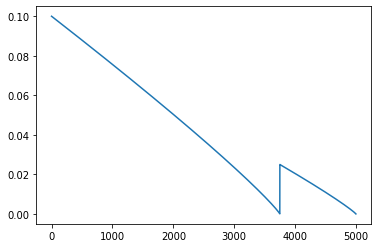

In [28]:
plt.plot(iters, lr_vals)

In [29]:
import torch

In [40]:
import random

random.randint(1, 3)

3

In [36]:
x = torch.rand(4, 3, 12, 14)

In [37]:
t_x = torch.rot90(x, k=1, dims=(2, 3))

In [38]:
t_x.shape

torch.Size([4, 3, 14, 12])

In [42]:
random.random()

0.5238836605486376

In [ ]:
x = torch.torch([])

In [44]:
t_x = torch.flip(x, dims=(3, ))